In [139]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

In [140]:
yolo = cv.dnn.readNet("yolov3.weights","yolov3.cfg")

In [141]:
with open("coco.names") as f:
    classes=np.array([c.strip("\n") for c in f.readlines()]) 

In [142]:
img = cv.imread("Naxos_Taverna.jpg")

blob = cv.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB = True,crop=False)

# print(img)
# cv.imshow("image",img)
# cv.waitKey(0)
# cv.destroyAllWindows()

(1024, 1536, 3)


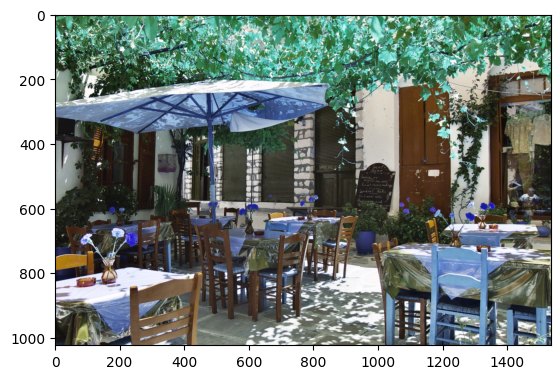

In [143]:
print(img.shape)
plt.imshow(img)

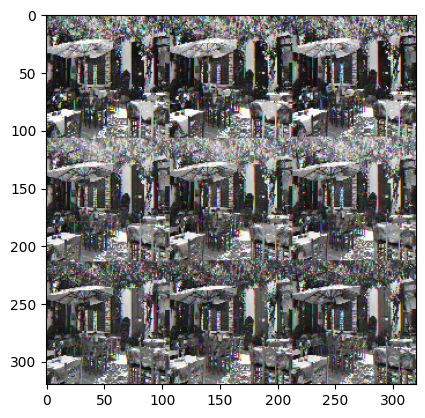

In [144]:
x = blob.reshape(320,320,3)
plt.imshow(x)

In [145]:
yolo.setInput(blob)

In [146]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layers_output = yolo.forward(output_layers_name)

In [147]:
print(len(layers_output))
print((layers_output[0]).shape)

3
(300, 85)


In [148]:
boxes =[]
confidences = []
class_ids =[]
width = img.shape[1]
height = img.shape[0]
for output in layers_output:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if(confidence > 0.5):
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            grid_width = int(detection[2] * width)
            grid_height = int(detection[3] * height)

            x1 = int(center_x - grid_width/2)
            y1 = int(center_y - grid_height/2)
            x2 = int(center_x + grid_width/2)
            y2 = int(center_y + grid_height/2)

            boxes.append([x1,y1,x2,y2])
            confidences.append(confidence)
            class_ids.append(class_id)



In [149]:
print(len(boxes))

27


In [150]:
indexes = cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [151]:
print(indexes)

[ 8 13 16 25  0 24]


In [152]:
colors = np.random.uniform(0,255,size=(len(boxes),3))
font = cv.FONT_HERSHEY_PLAIN


In [156]:
for i in indexes:
    x1,y1,w2,h2 = boxes[i]
    color = colors[i]
    label = classes[class_ids[i]]
    print(color)

    cv.rectangle(img,(x1,y1),(x2,y2),(0,0,0),5)
    cv.putText(img,label,(x1,y1+20),font,5,color,10)
    
    
    

[29.59460514 20.9159415  46.69709268]
[120.46317356 196.36885535 253.47003108]
[ 55.92886884  86.98546494 205.37028343]
[ 82.6280807   42.51439947 176.9344851 ]
[ 63.67261962 236.39280714  36.56684797]
[114.52915379 145.98593662 101.62163616]


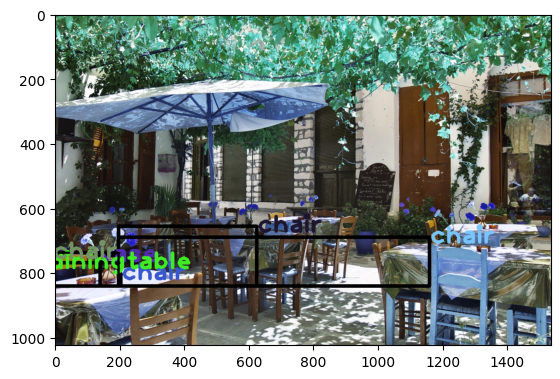

In [157]:
plt.imshow(img)

In [163]:
boxes[1]

[1063, 699, 1521, 1013]

In [203]:
from PIL import Image
img = Image.open("Naxos_Taverna.jpg")

for i in range(len(boxes)):
    box = tuple(boxes[i])
    print(i)
    cropped_img = img.crop(box)
    cropped_img.save(f'cropped_image{i}.jpg')
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
